In [ ]:
# Team Bean Burrito
'''
Gabrielle Guidote 40175182
Marie-Jose Castellanos 40168044
Amrit Sohpal 40176197
'''
# Assignment 1
# Penguin Dataset
# output file : penguin-performance.txt 

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#4 a : DT
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#4 b : DT GridSearch
from sklearn.model_selection import GridSearchCV

#4 c: MLP
from sklearn.neural_network import MLPClassifier

# performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

The Data sets

DATASET 1 :  PENGUINS

In [ ]:
# data regarding penguins such as their island, sex and a variety of physical features and we need to predict their species (Adelie, Gentoo, Chinstap)
df = pd.read_csv("penguins.csv")
df.info()
df.head()
print(df["island"].unique())

Methods for transforming string to numerical values

In [ ]:
# Island and sex features are strings

# i. convert these features into 1-hot vectors (also known as dummy-coded data)
df = pd.get_dummies(df,columns=['sex','island'])
df.head()
# ii. convert these features into categories yourself

# Replace Sex
# df['sex'].replace(['MALE', 'FEMALE'], [0, 1], inplace=True)
# print(df["sex"].unique())

# # Replace Island
# df['island'].replace(['Torgersen', 'Biscoe', 'Dream'], [0,1, 2], inplace=True)
# print(df["island"].unique())

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181,3750,0,1,0,0,1
1,Adelie,39.5,17.4,186,3800,1,0,0,0,1
2,Adelie,40.3,18.0,195,3250,1,0,0,0,1
3,Adelie,36.7,19.3,193,3450,1,0,0,0,1
4,Adelie,39.3,20.6,190,3650,0,1,0,0,1


2. Plot the percentage of the instances in each output class and store the graphic in a file called penguin-classes.gif
/ abalone-classes.gif. This analysis of the dataset will allow you to determine if the classes are balanced.
Which metric is more appropriate to use to evaluate the performance. Be ready to discuss this at the demo.

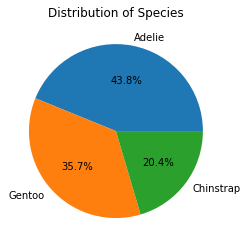

In [ ]:
class_count = df['species'].value_counts()
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%')
plt.title('Distribution of Species')
# plt.show()

# save image 
plt.savefig('penguin-classes.png') 

3. Split the dataset
 using train test split using the default parameter values

In [ ]:
X =  df.loc[:, df.columns != 'species']
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

4. Train and test 4 different classifiers:

# Base DT
(a) Base-DT: a Decision Tree with the default parameters. Show the decision tree graphically (for the
abalone dataset, you can restrict the tree depth for visualisation purposes)

In [ ]:
# Training base DT
base_DT_D1 = DecisionTreeClassifier()
base_DT_D1.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.6029411764705882, 0.9166666666666666, 'X[2] <= 206.5\ngini = 0.636\nsamples = 249\nvalue = [112, 51, 86]'),
 Text(0.3235294117647059, 0.75, 'X[0] <= 43.35\ngini = 0.43\nsamples = 159\nvalue = [110, 48, 1]'),
 Text(0.11764705882352941, 0.5833333333333334, 'X[0] <= 42.35\ngini = 0.018\nsamples = 108\nvalue = [107, 1, 0]'),
 Text(0.058823529411764705, 0.4166666666666667, 'gini = 0.0\nsamples = 103\nvalue = [103, 0, 0]'),
 Text(0.17647058823529413, 0.4166666666666667, 'X[7] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(0.11764705882352941, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5294117647058824, 0.5833333333333334, 'X[7] <= 0.5\ngini = 0.147\nsamples = 51\nvalue = [3, 47, 1]'),
 Text(0.4117647058823529, 0.4166666666666667, 'X[5] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.35294117647058826, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Tex

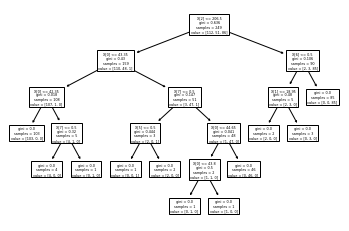

In [ ]:
# Tree Visualization : https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html TODO : change figure size because its really tiny
tree.plot_tree(base_DT_D1)

In [ ]:
# Testing base DT
predictions = base_DT_D1.predict(X_test)

In [ ]:
# Performance
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[33  1  0]
 [ 1 16  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        34
   Chinstrap       0.94      0.94      0.94        17
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84



In [ ]:
# Output file
# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.

# (B) the confusion matrix

# (C) the precision, recall, and F1-measure for each class

# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

# TOP DT
(b) Top-DT: a better performing Decision Tree found using a gridsearch. The gridsearch will allow you
to find the best combination of hyper-parameters, as determined by the evaluation function that you
have determined in step (3) above. The hyper-parameters that you will experiment with are:
• criterion: gini or entropy
• max depth : 2 different values of your choice and ”None”
• min samples split: 3 different values of your choice
Show the decision tree graphically (for the abalone dataset, you can restrict the tree depth for visualisation purposes)

In [ ]:
# Training top DT
parameters = {'criterion':['gini','entropy'], 'max_depth':[3,5,None], 'min_samples_split':[2,5,10]}

top_DT_D1 = DecisionTreeClassifier()
top_DT_D1 = GridSearchCV(top_DT_D1, parameters)

top_DT_D1.fit(X_train, y_train)

print(top_DT_D1.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [ ]:
# Testing base DT
predictions = top_DT_D1.predict(X_test)

In [ ]:
# Performance
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[34  0  0]
 [ 1 16  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        34
   Chinstrap       1.00      0.94      0.97        17
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84



In [ ]:
# Output file
# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.

# (B) the confusion matrix

# (C) the precision, recall, and F1-measure for each class

# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

# BASE MLP
(c) Base-MLP: a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logistic
as activation function, stochastic gradient descent, and default values for the rest of the parameters

In [ ]:
# Training base MLP
base_MLP_d1 = MLPClassifier(hidden_layer_sizes=(100,100), activation='logistic', solver='sgd')
base_MLP_d1.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              solver='sgd')

In [ ]:
# Testing base MLP
predictions = base_MLP_d1.predict(X_test)

In [ ]:
# Performance TODO : VERY BAD AND HAS A WARNING>>> RECHECK STUFF
print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[39  0  0]
 [13  0  0]
 [32  0  0]]
              precision    recall  f1-score   support

      Adelie       0.46      1.00      0.63        39
   Chinstrap       0.00      0.00      0.00        13
      Gentoo       0.00      0.00      0.00        32

    accuracy                           0.46        84
   macro avg       0.15      0.33      0.21        84
weighted avg       0.22      0.46      0.29        84



c:\Users\Caste\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Caste\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Caste\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Output file
# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.

# (B) the confusion matrix

# (C) the precision, recall, and F1-measure for each class

# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

# TOP MLP

(d) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
to experiment with the following hyper-parameter values:
• activation function: sigmoid, tanh and relu
• 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers
with 10 + 10 + 10
• solver: adam and stochastic gradient descent

In [ ]:
# Output file
# (A) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model 
    # (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP,
    # display the best hyperparameters found by the gridsearch.

# (B) the confusion matrix

# (C) the precision, recall, and F1-measure for each class

# (D) the accuracy, macro-average F1 and weighted-average F1 of the model

6. Redo steps 4 & 5, 5 times for each model and append in the performance files:
(A) the average accuracy & the variance,
(B) average macro-average F1 & the variance,
(C) average weighted-average F1 & the variance.
Does the same model give you the same performance every time? is the standard deviation high? Be ready
to discuss this at the demo.